# Hourly Time Series Forecasting using Facebook's Prophet

In this notebook we will use facebook's prophet package to forecast hourly energy use. 

1. Import useful libraries

In [ ]:
!pip install -q fsspec
!pip install -q s3fs

In [ ]:
import numpy as np
import pandas as pd

from fbprophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
# setting Jedha color palette as default
pio.templates["jedha"] = go.layout.Template(
    layout_colorway=["#4B9AC7", "#4BE8E0", "#9DD4F3", "#97FBF6", "#2A7FAF", "#23B1AB", "#0E3449", "#015955"]
)
pio.templates.default = "jedha"
pio.renderers.default = "svg" # to be replaced by "iframe" if working on colab

# Data
The data we will be using is hourly power consumption data from PJM. Energy consumtion has some unique charachteristics. It will be interesting to see how prophet picks them up.

Pulling the `PJM East` which has data from 2002-2018 for the entire east region.

2. import the data thanks to the following link : ```https://full-stack-bigdata-datasets.s3.eu-west-3.amazonaws.com/Machine+Learning+Supervis%C3%A9/time_series/PJME_hourly.csv`` make sure to use the arguments ```index_col=[0], parse_dates=[0]``` and remove all dates previous to january the first 2008

,PJME_MW
Datetime,
2008-01-01 00:00:00,30998.0
2008-12-31 01:00:00,28937.0
2008-12-31 02:00:00,27714.0
2008-12-31 03:00:00,27120.0
2008-12-31 04:00:00,26995.0


3. Plot the time series

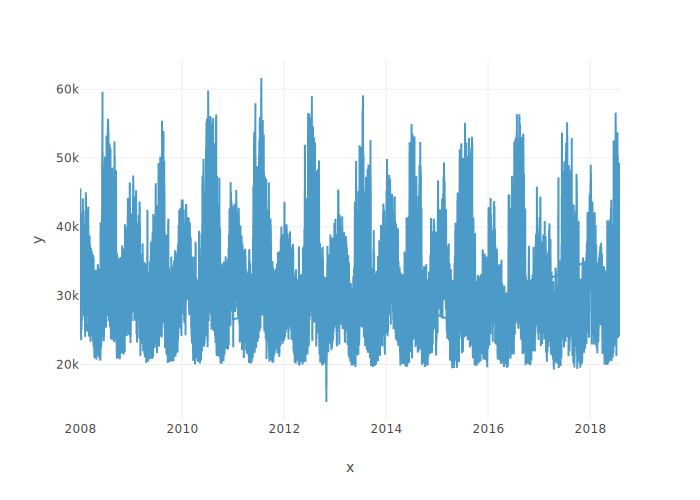

# EDA

4. Create this collection of new variables :
* ```date``` equal to the index
* ```hour``` equal to the hour of the day
* ```dayofweek```
* ```quarter```
* ```month```
* ```year```
* ```dayofyear```
* ```dayofmonth```
* ```weekofyear```

Create an object X containing the above variables and y containing the time series

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.



5. Create an object features_and_target containing both and display the first few lines

,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,PJME_MW
Datetime,,,,,,,,,
2008-01-01 00:00:00,0,1,1,1,2008,1,1,1,30998.0
2008-12-31 01:00:00,1,2,4,12,2008,366,31,1,28937.0
2008-12-31 02:00:00,2,2,4,12,2008,366,31,1,27714.0
2008-12-31 03:00:00,3,2,4,12,2008,366,31,1,27120.0
2008-12-31 04:00:00,4,2,4,12,2008,366,31,1,26995.0


## Plotting the Features to see trends

6. Plot the time series against hour, dayofweek, weekofyear, year


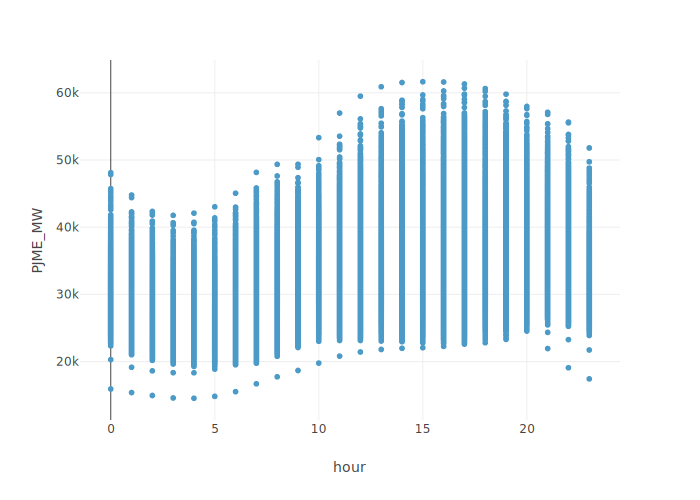

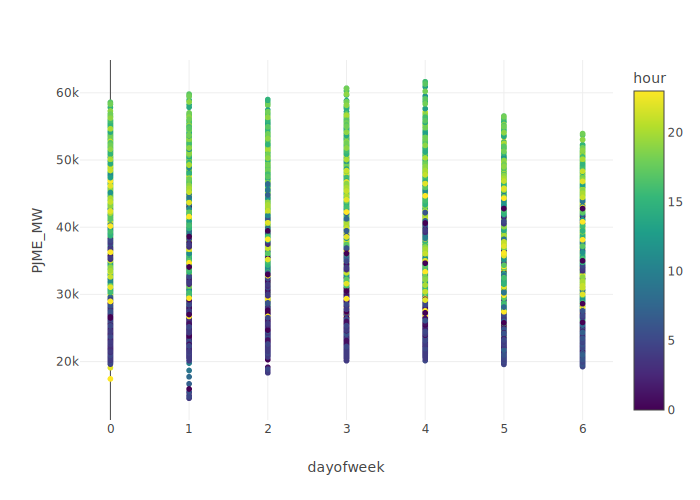

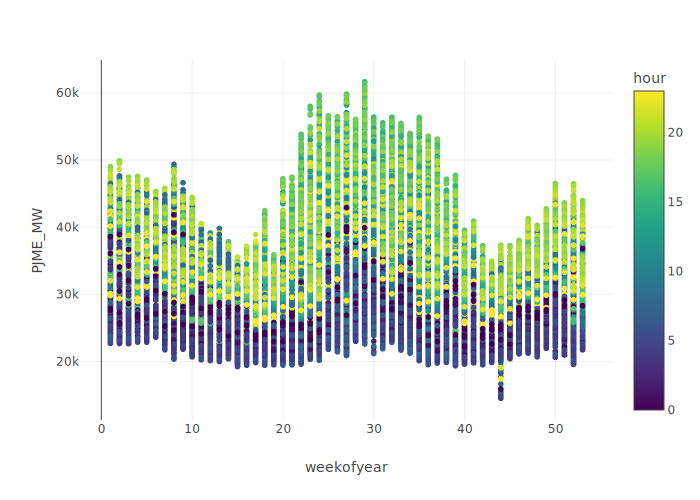

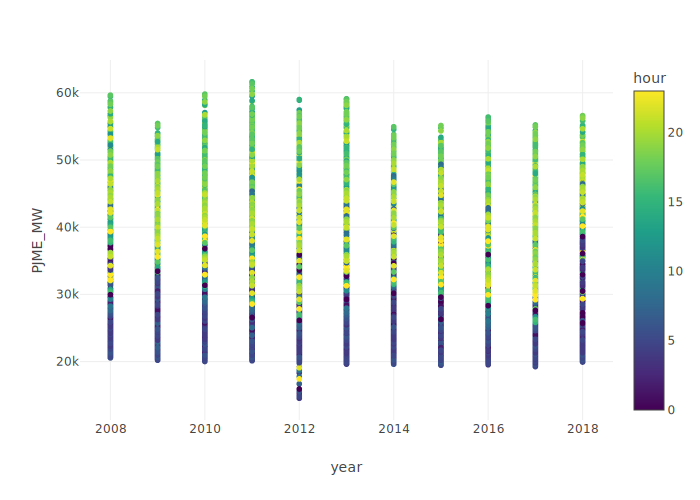

# Train/Test Split
7. Cut off the data after 2015 to use as our validation set. We will train on earlier data.

8. plot the series with different colors for the train and test set to visualize the separation.

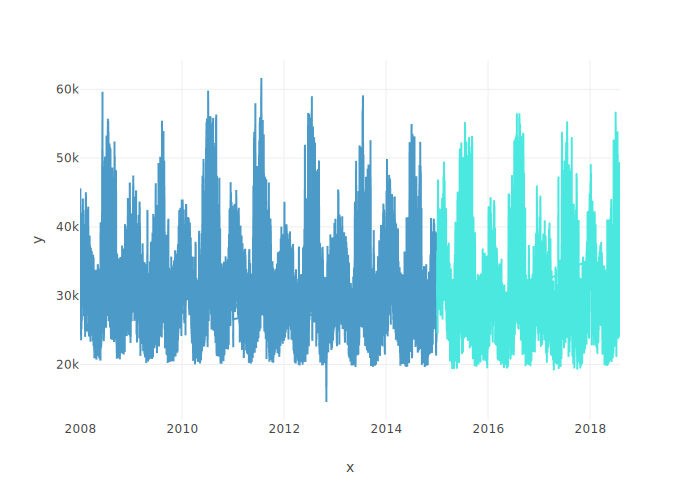

# Simple Prophet Model
9. In pjme_train rename the Datetime variable "ds" and PJME_MW "y" to fit into the Prophet framework

,ds,y
0,2008-01-01 00:00:00,30998.0
1,2008-12-31 01:00:00,28937.0
2,2008-12-31 02:00:00,27714.0
3,2008-12-31 03:00:00,27120.0
4,2008-12-31 04:00:00,26995.0


10. Create an instance of the Prophet model and fit it on the train data.

11. Make predictions with your trained default prophet model on the test set

13. Plot the trend, the yearly seasonnality, the weekly seasonnality, and the daily seasonnality.

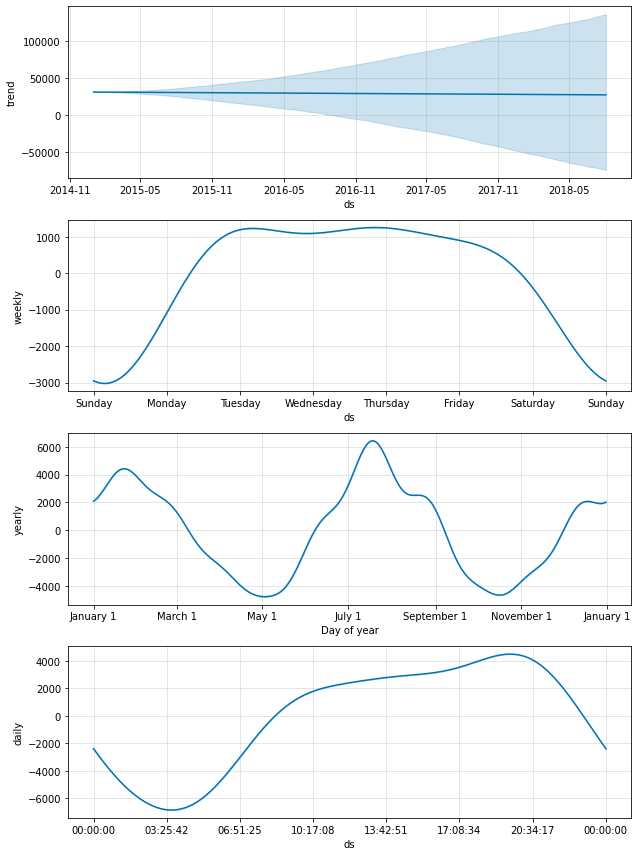

# Compare Forecast to Actuals

14. Plot the forcasts against the actual values in the test set.

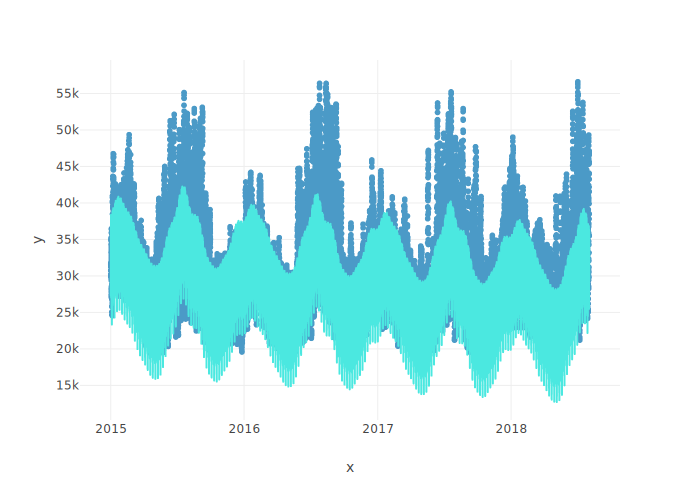

# Look at first month of predictions

15. Compare in a graph predictions for the first month against reality.

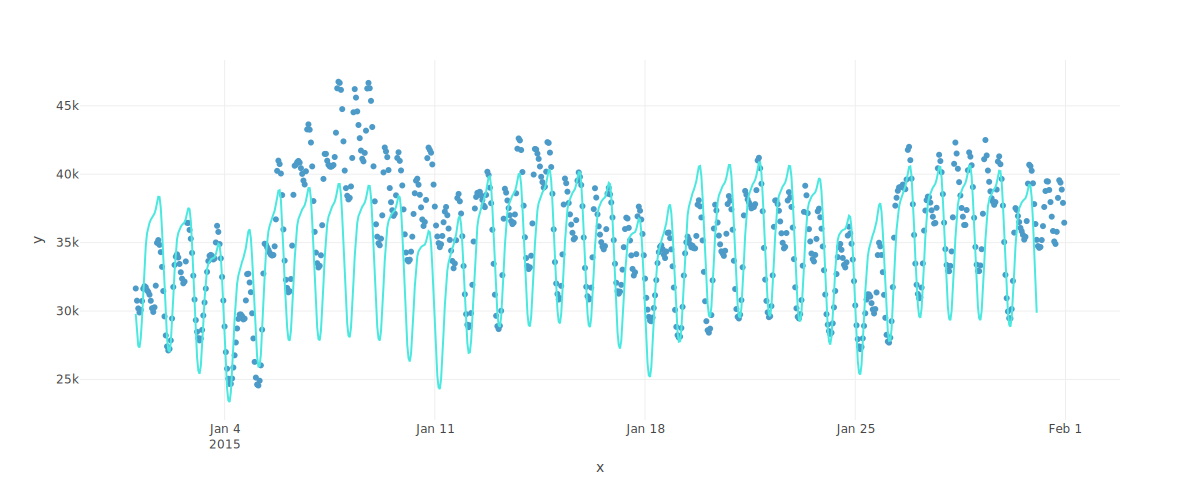

# Single Week of Predictions

16. plot the first week of data against the model's predictions

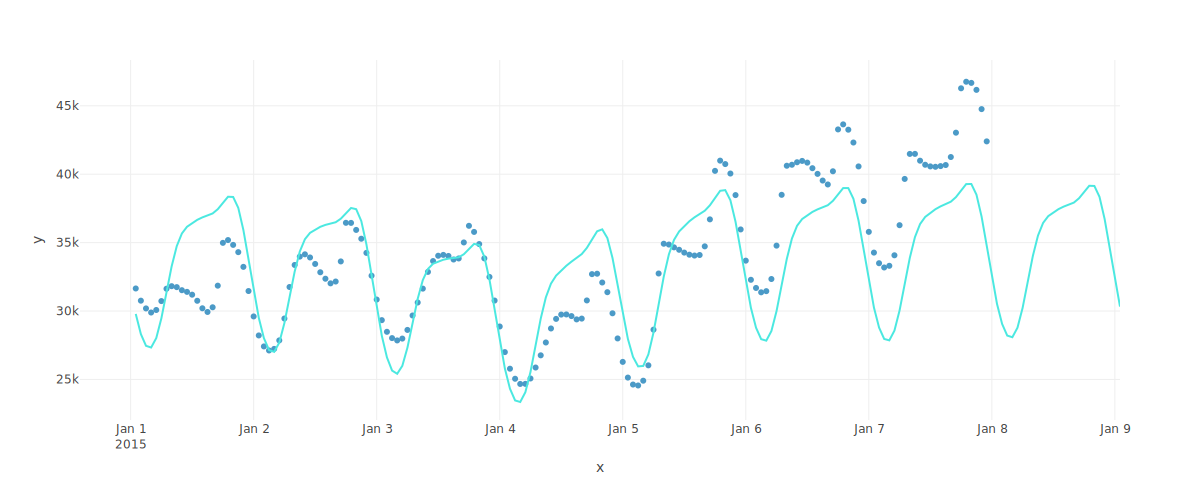

17. Calculate the MSE, the MAE and the MAPE (mean obsolute percentage error) for this model over the test dataset
$$MAPE = \frac{1}{n}\sum_{t=1}^{n}|\frac{Y_t - \hat{Y_t}}{Y_t}|$$

The MSE on the test set is : 
 46471087.94873971


The MAE on the test set is : 
 5327.881441554647


The MAPE on the test set is : 
 16.501205418693875


# Adding Holidays
Next we will see if adding holiday indicators will help the accuracy of the model. Prophet comes with a *Holiday Effects* parameter that can be provided to the model prior to training. 

We will use the built in pandas `USFederalHolidayCalendar` to pull the list of holidays

18. Create a test_holidays object containing the us federal holidays for the considered test period and an object train_holidays for the considered train period.

19. Create a DataFrame contaning all holidays over the observed period with a ds column with the dates and a holiday column with the holidays and convert ds column to datetime format.

,ds,holiday
0,2008-01-01 00:00:00,USFederalHoliday
1,2009-01-01 00:00:00,USFederalHoliday
2,2008-12-25 01:00:00,USFederalHoliday
3,2008-12-25 02:00:00,USFederalHoliday
4,2008-12-25 03:00:00,USFederalHoliday


20. Create an instance of the Prophet model with ```holidays = holiday_df``` the DataFrame we have just created, and train that model on the training set.

## Predict With Holidays

21. Make predictions for the test set with the holiday model

## Plot Holiday Effect

22. Plot the different components of the holiday model

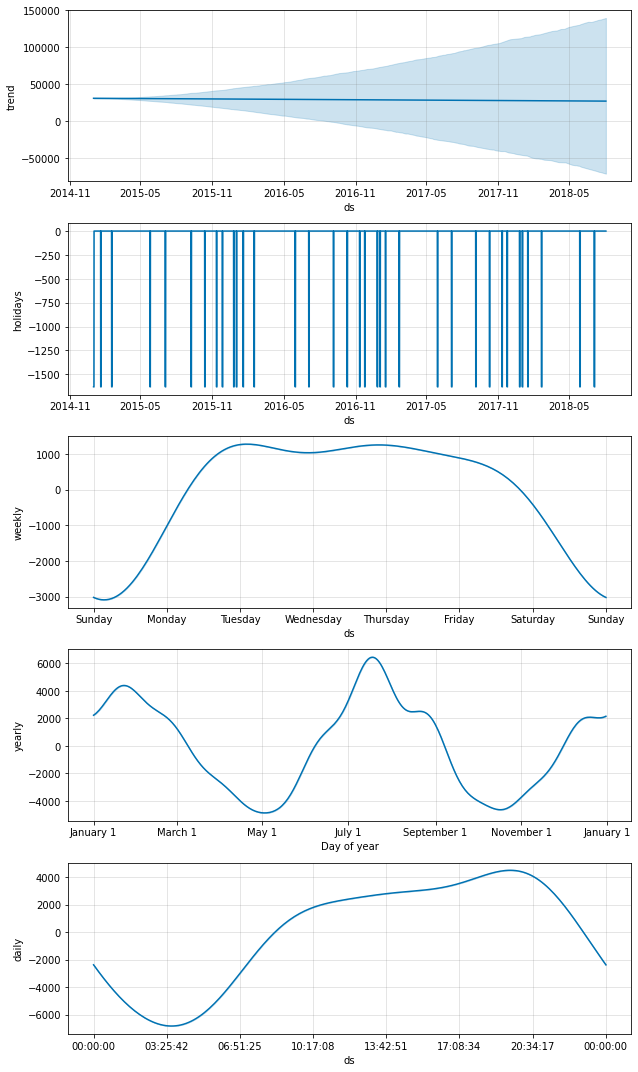

# Error Metrics with Holidays Added
23. Calculate the MSE, MAE and MAPE for the holiday model on the test set.

The MSE on the test set is : 
 46708833.73505651


The MAE on the test set is : 
 5345.507641392378


The MAPE on the test set is : 
 16.555899376151928
